In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime


plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']#中文化的作法

### 目標：在年後賣出能可獲利

產業別           | 股票  
--------------|:-----:|
貨櫃航運 | 陽　明 (2609)| 
貨櫃航運 |長　榮 (2603)| 
貨櫃航運 | 萬　海 (2615)|
航運_航空   | 長榮航 (2618)|  
航運_航空 | 華　航 (2610) |  
航運_航空 | 遠雄港 (5607)| 
航運_航空 | 台驊投控 (2636)| 
散裝航運 |裕　民 (2606)|
散裝航運 |益　航 (2601)|
散裝航運 |東　森 (2614)|
散裝航運 |新　興 (2605)|
散裝航運 |四維航 (5608)|
散裝航運 |台　航 (2617)|



#### 畫圖分析 >>> 時間從2016/01~2021/05 每月的最大價格、最低價格、價格中位數、交易筆數中位數

In [3]:
data_file=sorted(os.listdir("Data_price") ,reverse =True)
data_file.pop()
data_file = pd.Series(data_file ,index=["貨櫃航運","航運_航空" ,"貨櫃航運","航運_航空","散裝航運","貨櫃航運","航運_航空","散裝航運","散裝航運","散裝航運"
                            ,"散裝航運","航運_航空","散裝航運"]).sort_index(ascending = False)
data_file

貨櫃航運       陽明_2609.csv
貨櫃航運       長榮_2603.csv
貨櫃航運       萬海_2615.csv
航運_航空     長榮航_2618.csv
航運_航空     遠雄港_5607.csv
航運_航空      華航_2610.csv
航運_航空    台驊投控_2636.csv
散裝航運       裕民_2606.csv
散裝航運       益航_2601.csv
散裝航運       東森_2614.csv
散裝航運       新興_2605.csv
散裝航運      四維航_5608.csv
散裝航運       台航_2617.csv
dtype: object

In [4]:
#取出資料
data_df_list =[]
data_ROE_ROA_df_list =[]
for file in data_file:
    dateparse = lambda x: datetime.datetime.strptime(x, '%Y%m')
    #price
    price_df=pd.read_csv(f"./Data_price/{file}" ,parse_dates=["Unnamed: 0"] , date_parser =dateparse )
    price_df.set_index("Unnamed: 0" ,inplace=True)
    price_df.index.names=[""]
    #EPS
    eps_df=pd.read_csv(f"./Data_EPS和PER/{file}" ,parse_dates=["Unnamed: 0"] , date_parser =dateparse )
    eps_df.set_index("Unnamed: 0" ,inplace=True)
    eps_df.index.names=[""]
    #PER
    PBR_df=pd.read_csv(f"./Data_股價淨值比/{file}" ,parse_dates=["Unnamed: 0"] , date_parser =dateparse )
    PBR_df.set_index("Unnamed: 0" ,inplace=True)
    PBR_df.index.names=[""]
    #ROE_ROA_
    ROE_ROA_df=pd.read_csv(f"./Data_ROE_ROA//{file}" ,parse_dates=["Unnamed: 0"] , date_parser =dateparse )
    ROE_ROA_df.set_index("Unnamed: 0" ,inplace=True)
    ROE_ROA_df.index.names=[""]
    
    df= pd.concat([price_df,eps_df ,PBR_df] ,axis=1)
    data_df_list.append(df)
    data_ROE_ROA_df_list.append(ROE_ROA_df)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


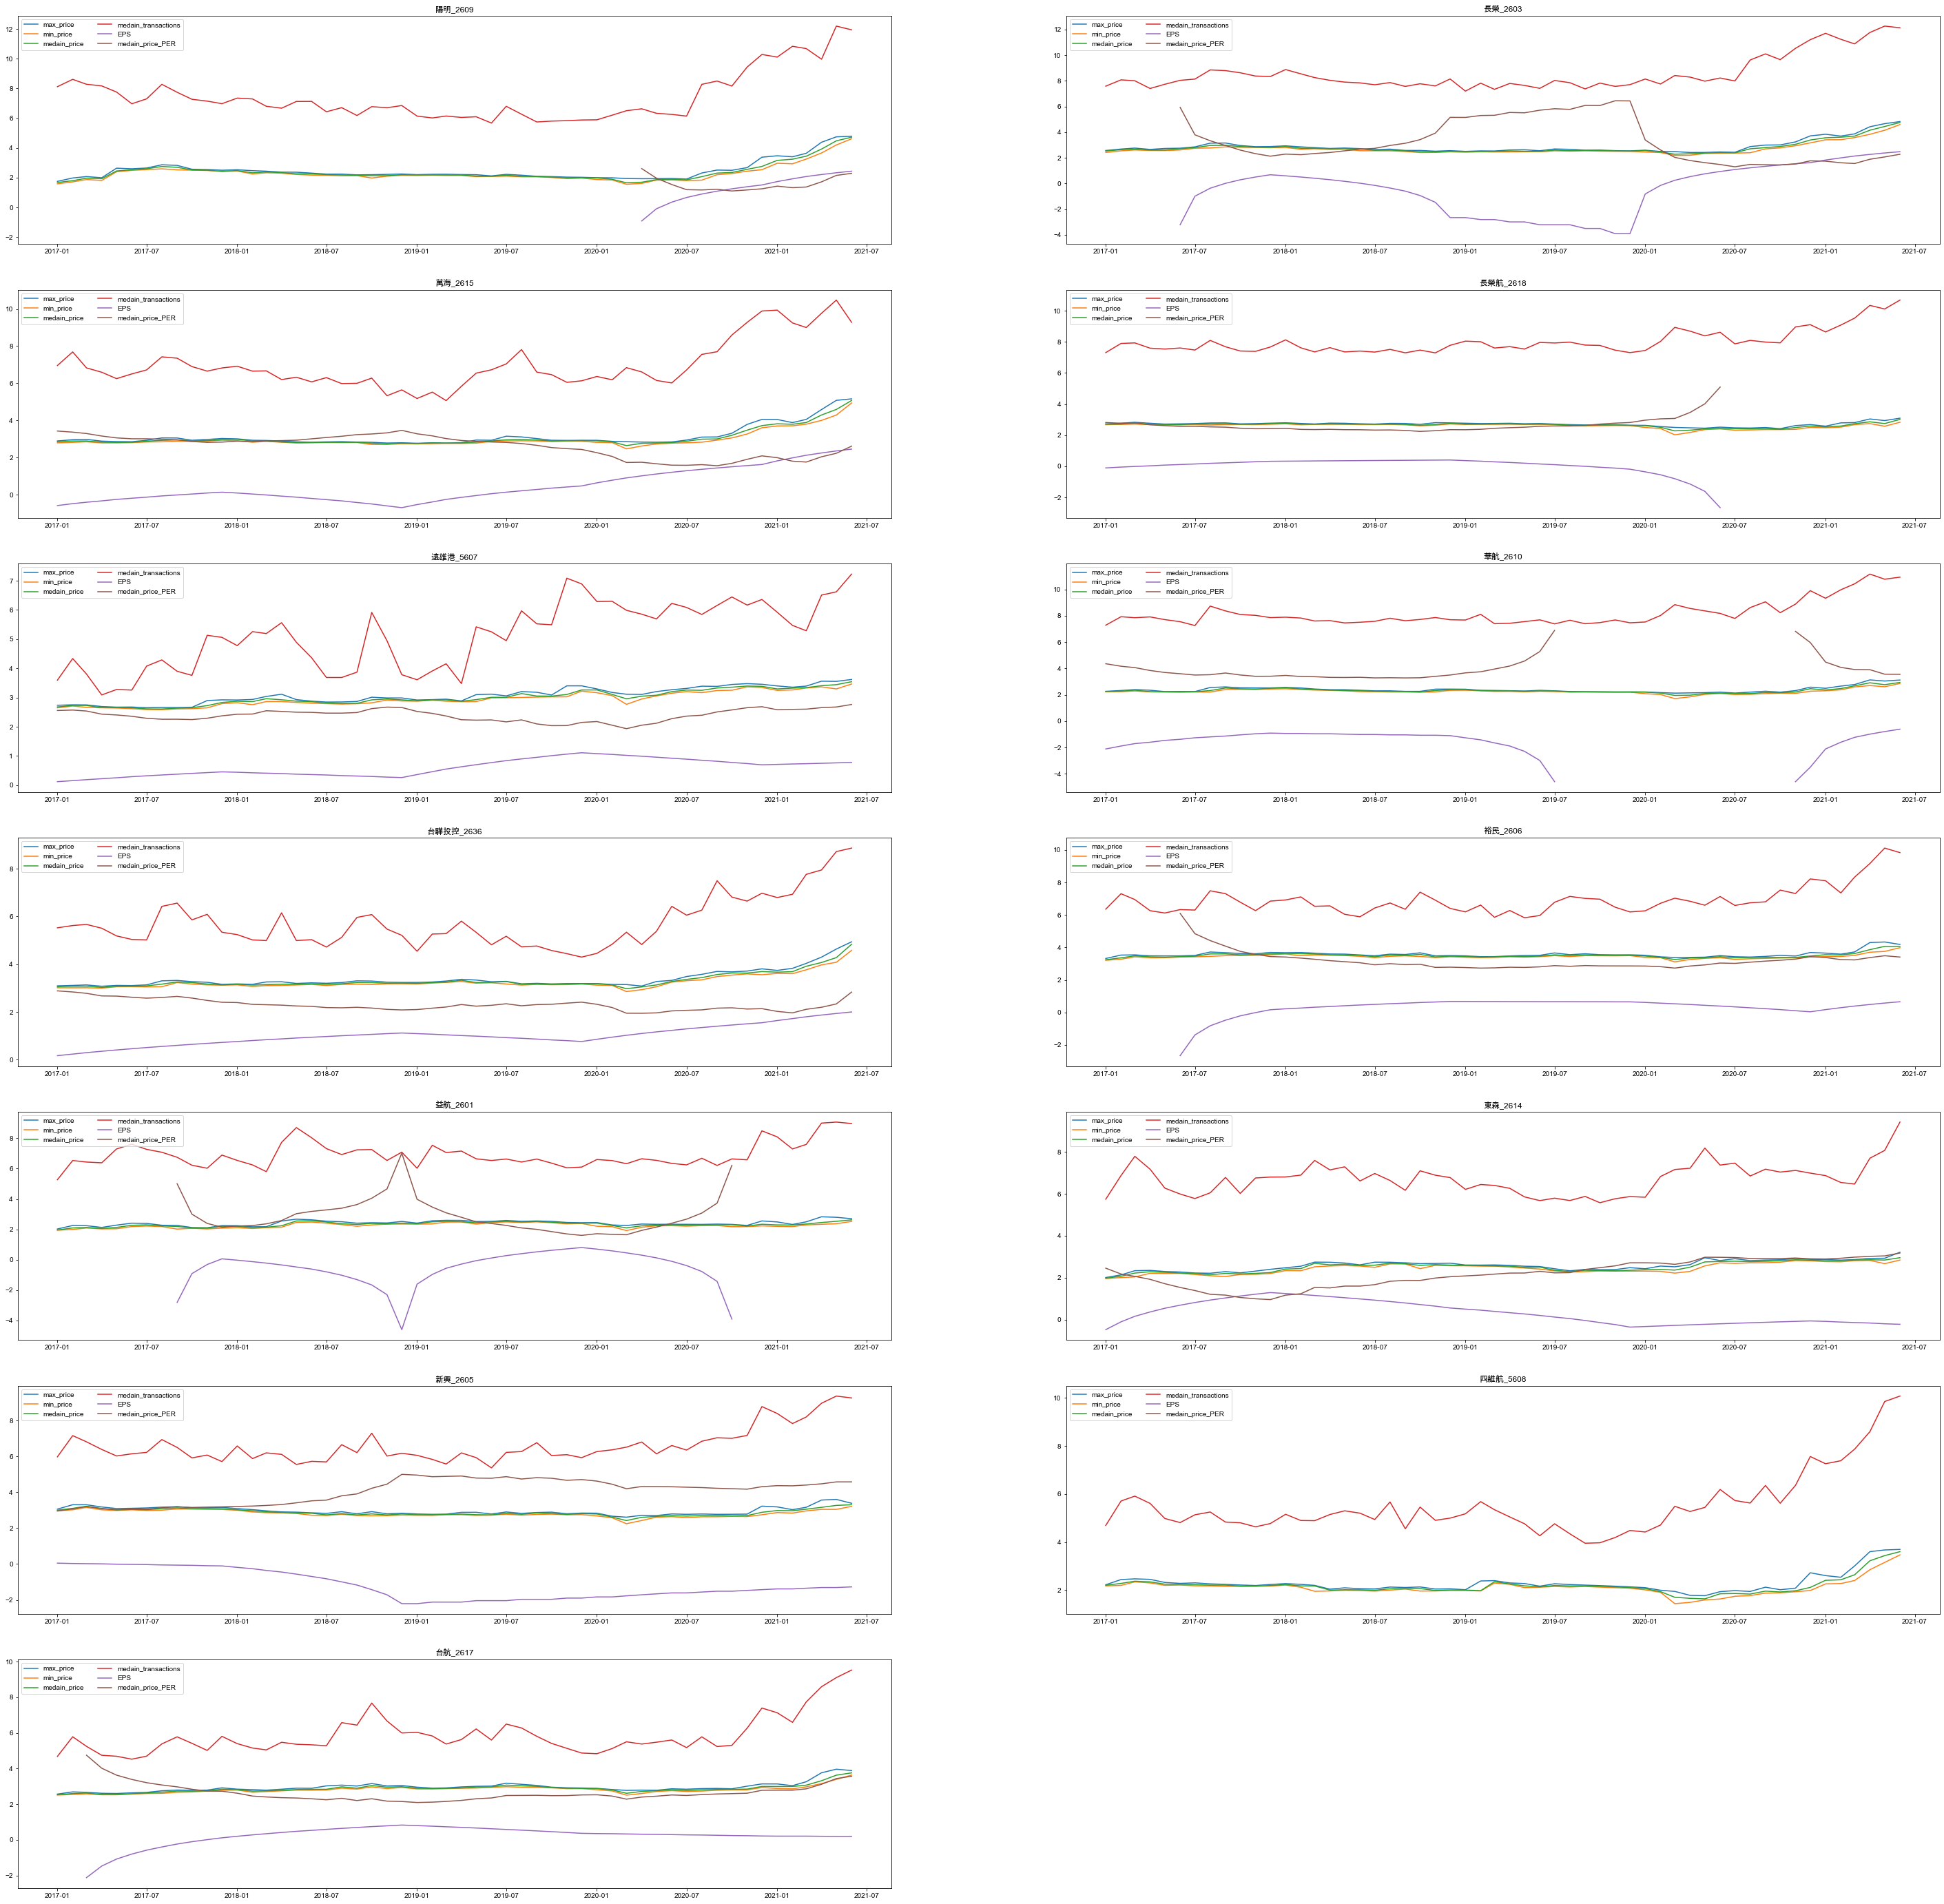

In [4]:
#個別公司的圖型，
nrows = 7
ncols = 2
plt.figure(figsize=(50,50))
for i , df , name in zip(range(len(data_df_list)) ,data_df_list , data_file.values ):
    plt.subplot(nrows, ncols, i+1)
    for column in df.columns:
        plt.plot(np.log(df[column]) ,label = column)
        plt.legend(loc=2, ncol=2)
        
    plt.title(name[:-4])

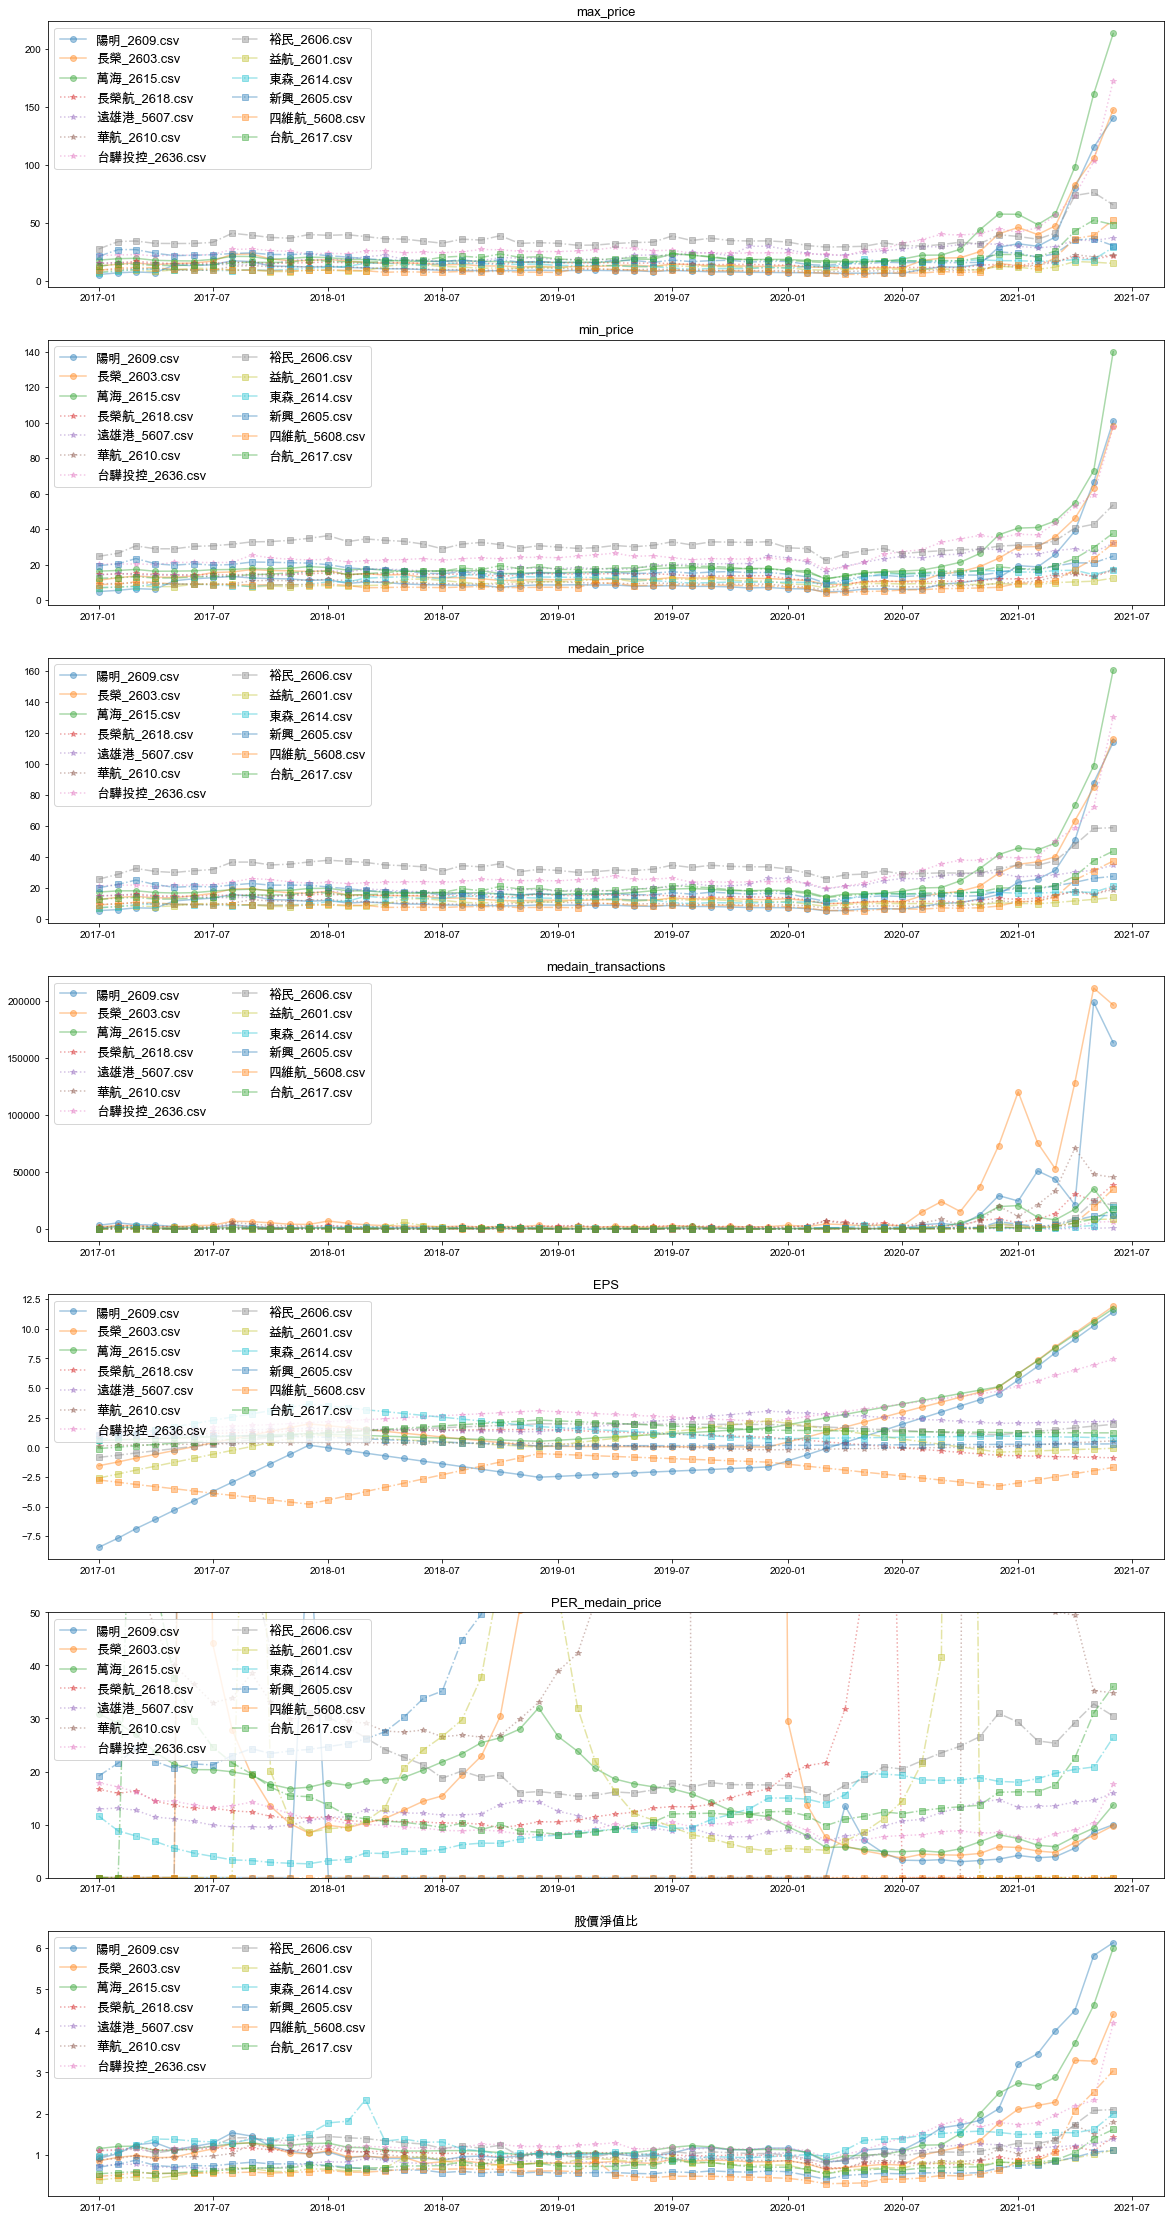

In [17]:
#取出四欄資料，分別做圖
nrows = 7
ncols = 1
plt.figure(figsize=(20,40))
for i ,name_columns in enumerate(data_df_list[1].columns):
    plt.subplot(nrows, ncols, i+1)
    line = ["-","-","-",":",":",":",":" ,"-.","-.","-.","-.","-.","-."]
    marker = ["o","o","o","*","*","*","*","s","s","s","s","s","s"]
    for df ,name , style  ,ls in zip(data_df_list ,data_file.values  , marker ,line ):
        plt.plot(df.iloc[:,i] , label = name  ,alpha=0.4  , marker = style  ,ls=ls)
        plt.legend(loc=2, ncol=2 ,fontsize=13)
        if "PER" in name_columns:
            plt.ylim((0,50))
    plt.title(name_columns ,fontsize =13)
    
 

In [ ]:
#從2020年開始的資料，疫情爆發期
nrows = 7
ncols = 1
plt.figure(figsize=(20,40))
for i ,name_columns in enumerate(data_df_list[1].columns):
    plt.subplot(nrows, ncols, i+1)
    line = ["-","-","-",":",":",":",":" ,"-.","-.","-.","-.","-.","-."]
    marker = ["o","o","o","*","*","*","*","s","s","s","s","s","s"]
    for df ,name , style  ,ls in zip(data_df_list ,data_file.values  , marker ,line ):
        plt.plot(df.iloc[37:,i] , label = name  ,alpha=0.4  , marker = style  ,ls=ls)
        plt.legend(loc=2, ncol=2 ,fontsize=13)
    plt.title(name_columns ,fontsize =13)
    #plt.savefig(f"{name_columns}.jpg")

#### 帳面方析：只有上述的資料，所做的分析
